## Training Models

### Linear Regression

Form: y = o + ox_1 + ox_2 + ox_3

o, o_1, etc are model params

x_1, .. are input features

y is the output

#### Vectorized form:

- y = theta dot x
- x is the feature vector -> x_0 is always 1, and 1..n are the features
- theta is the parameter vector -> o_0 is the bias term, o_1..n are feature weights

##### Normal equation:

O (theta) = (X^T @ X)^-1 @ X^T @ y

The inverse of the (Input matrix transposed times input matrix) times input transposed times y, which is the vector of target values containing y(1)..y(m) 

Theta hat is the value of the parameter vector that minimizes the cost function.

In [1]:
# generating random data
import numpy as np
rng = np.random.default_rng(seed=42)
X = 2*(rng.random((200,1)))
Y = 4 + 3 * X + rng.standard_normal((200,1))

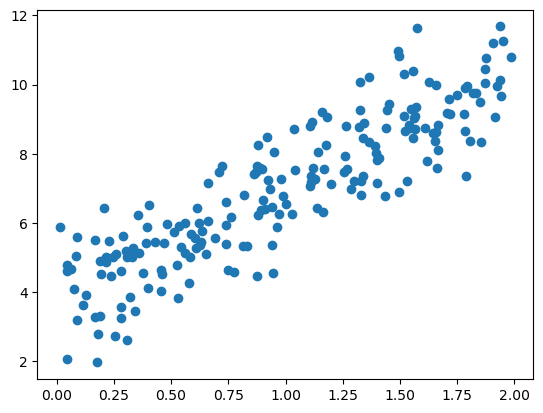

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.show()

In [3]:
# find theta hat
from sklearn.preprocessing import add_dummy_feature

Xb = add_dummy_feature(X)
theta = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ Y
theta
# the best linear params are an intercept of 3.69, and slope of 3.32. 
# remember the original input we used was 4 and 3, so not too far off. Would get closer w more data / less noise

array([[3.69084138],
       [3.32960458]])

In [4]:
# make predictions with theta hat
Xnew = np.array([[0], [2]])
XnewB = add_dummy_feature(Xnew)
pred = XnewB @ theta
pred
# when x is 0, predicts 3.69, when its 2, predicts 10.35

array([[ 3.69084138],
       [10.35005055]])

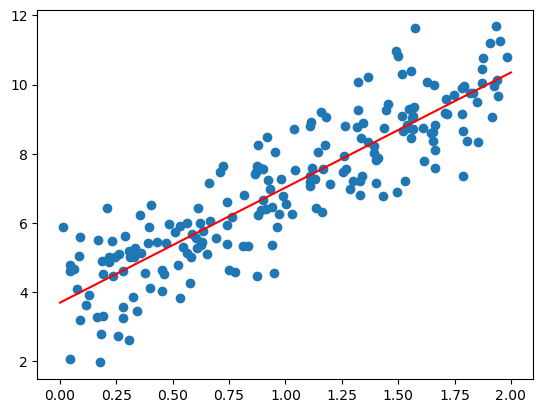

In [5]:
import matplotlib.pyplot as plt
plt.plot(Xnew, pred, "r-")
plt.scatter(X, Y)
# not bad

In [6]:
# do everything in Scikit
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,Y)
reg.intercept_, reg.coef_

(array([3.69084138]), array([[3.32960458]]))

#### Time Complexity

In [7]:
# Normal Equation does an inverse, which is O(n^2.4) 
# Scikit does SVD, which is about O(n^2)
# -> svd splits X into three matrices

### Gradient Descent


In [8]:
# tweak parameters iteratively to minimize a cost function
# find gradient of the error function, with regard to parameter vector theta
# do this over and over until gradient is 0 -> converges

# learning rate: how big gradient descent jumps are -> hyperparameter
# gradient descent can fail to converge to the global min if there are lots of local minima or plateaus

# MSE for linear regression has no minima besides the global min, so should converge 

In [9]:
# MSE = (1/m) (sum (thetaT * x(i) - y(i)^2)
# deriv w/ respect to param j= (2/m) (sum (thetaT*x(i) - y(i))) (x(i)j)

# Gradient vector of the cost function = (2/m) X^T (X*Theta-y)
# Gradient points to increased cost, so go opposite direction

# Theta(next step) = Theta - (learning rate)*(gradient vector)

In [10]:
#implementation
learningRate = 0.1
epochs = 1000
m = len(Xb)

rng = np.random.default_rng(seed=42)
theta = rng.standard_normal((2,1))
theta #is random now

for epoch in range(epochs):
    gradients = (2 / m) * Xb.T @ (Xb @ theta - Y)
    theta = theta - learningRate*gradients

theta

array([[3.69084138],
       [3.32960458]])

#### Stochastic Gradient Descent

In [11]:

# picks a random instance at each training step, computes gradients based on that instance
# bounces around the cost function, will never reach the true minimum but can get very close
# when the cost function is irregular, this can help get out of local mins

epochs = 50
t0, t1 = 5, 50 #hyperparams
m = len(Xb) #length of input 

def learningSchedule(t):
    return t0 / (t+t1)
rng = np.random.default_rng(seed=42)
theta = rng.standard_normal((2,1))
for epoch in range(epochs):
    for i in range(m):
        ranIndex = rng.integers(m)
        xi = Xb[ranIndex:ranIndex+1]
        yi = Y[ranIndex:ranIndex+1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        lr = learningSchedule(epoch*m+i)
        theta = theta-lr*gradients

theta
# gets close in 50 epochs
# since we randomly pick m instances per epoch we could get the same instance multiple times

array([[3.69826475],
       [3.30748311]])

In [12]:
# For SGD, note training instances must be IID
# pick each one randomly or shuffle the set

In [13]:
# Linear regression with SGD in Scikit
from sklearn.linear_model import SGDRegressor
sgdReg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=.01, n_iter_no_change=100, random_state=42)
#runs for 1000 epochs, or until loss drops to less than 1e-5 for 100 epochs.
#eta0 is the learning rate, with no regularization (penalty=None)
sgdReg.fit(X, Y.ravel())
sgdReg.intercept_, sgdReg.coef_

(array([3.68899733]), array([3.33054574]))

In [14]:
# note: you can call .partial_fit() on some estimators to run a single round of training
# need to be careful since .fit() and .partial_fit() do different things to the learning scheduler
# if you set warm_start=True, fit() will resume instead of restart training

#### Mini Batch Gradient Descent

In [15]:
# where batch does all instances and stochastic does single instances, mini batch does subsets of all instances
# mini batch > stochastic because of GPU acceleration

## Polynomial Regression

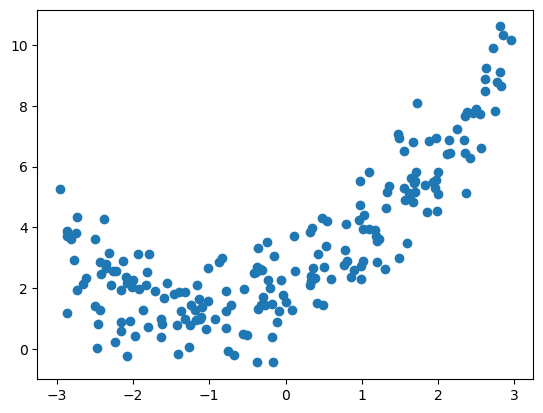

In [16]:
# add powers of each feature as new features, then train linear model on this

rng = np.random.default_rng(seed=42)
instances = 200
X = 6 * rng.random((m,1)) - 3
y = 0.5 * X **2 + X + 2 + rng.standard_normal((m,1))
plt.scatter(X,y)
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
xPoly = poly.fit_transform(X)
xPoly[0] # in, out

array([1.64373629, 2.701869  ])

In [18]:
linreg = LinearRegression()
linreg.fit(xPoly, y)
linreg.intercept_, linreg.coef_

# the original function had intercept of 2, coefficients of 1 and 0.5, so we got close

(array([2.00540719]), array([[1.11022126, 0.50526985]]))

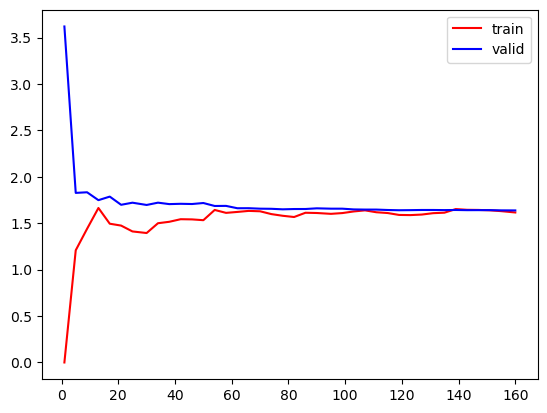

In [19]:
# adding more degrees to a polynomial regression generally leads to overfitting the data
# verify this with cross validation
# or learning curves with scikit's learning_curve()

from sklearn.model_selection import learning_curve
trainSizes, trainScores, validScores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(.01, 1, 40), cv=5, scoring="neg_root_mean_squared_error"
)
trainErrors = -trainScores.mean(axis=1)
validErrors = -validScores.mean(axis=1)
plt.plot(trainSizes,trainErrors, "r-", label="train")
plt.plot(trainSizes, validErrors, "b-", label="valid")
plt.legend()
plt.show()

# this is underfitting. the y axis is rmse and its still around 1.5

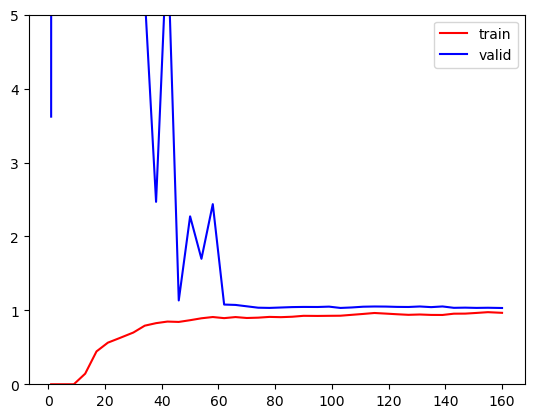

In [20]:
# 10-degree polynomial learning curve
from sklearn.pipeline import make_pipeline
polyReg = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

trainSizes, trainScores, validScores = learning_curve(
    polyReg, X, y, train_sizes=np.linspace(.01, 1, 40), cv=5, scoring="neg_root_mean_squared_error"
)
trainErrors = -trainScores.mean(axis=1)
validErrors = -validScores.mean(axis=1)
plt.plot(trainSizes,trainErrors, "r-", label="train")
plt.plot(trainSizes, validErrors, "b-", label="valid")
plt.legend()
plt.ylim((0,5))
plt.show()
# gap between curves suggests overfitting
# the error is lower, though

### Bias-Variance Trade Off

A model's generalization error is the sum of three errors:
- Bias: wrong assumptions, like assuming linearity on quadratic data
- Variance: models with many degrees of freedom have high sensitivity to small changes in data, like 300 degree polynomial models
- Irreducible error: natural noise in data. comes from everywhere, bad sensors, data sources, etc

Increasing complexity improves bias but makes variance worse.
Reducing complexity (or increasing regularization) increases bias and reduces variance.

### Regularization

In [21]:
# less degrees of freedom = less chance of overfitting (is the idea)
# but what about linear models? -> have to constrain weights
# 3 ways: ridge, lasso, and elastic net regression

#### Ridge Regression

In [22]:
# a regularized version of linear regression
# add regularization term to MSE: (alpha / m) * sum of theta squared
# the goal is to keep theta weights small -> high theta weights mean more variance and overfitting
# train by adding regularization to MSE cost function, but evaluate without regularization
# alpha is the hyperparameter and controls how much regularization there is. alpha=0 is just linear regression, and alpha=999999999 gives flat lines

# ridge(theta) = mse(theta) + alpha/m * sum(i to m) of theta^2
# note sum is from i to m, theta 0 (the bias term) is not regularized

In [23]:
# Ridge regression closed form solution:
# A is the (n+1) x (n+1) identity matrix with a top left 0
# theta hat = (X^T @ X + alpha*A)^-1 @ X^T @ y

In [24]:
from sklearn.linear_model import Ridge
# cholesky uses the closed form solution instead of svd or sgd
ridgeReg = Ridge(alpha=0.1, solver="cholesky")
ridgeReg.fit(X,y)
print(ridgeReg.predict([[1.5]]))

# with sgd
sgdReg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None, max_iter=1000, eta0=.01, random_state=42)
sgdReg.fit(X, y.ravel())
print(sgdReg.predict([[1.5]]))

[[5.06157854]]
[5.06208065]


### Lasso Regression

In [25]:
# lasso will shrink some weights exactly to 0
# does l1 norm
# Lasso(theta) = MSE(theta) + 2alpha sum(1 to n)[(abs theta)]

# where ridge is smooth, lasso penalties are jagged due to the lack of the square

# due to the absolute value, lasso is not differentiable, but you can use a subgradient vector to do gradient descent
# it's in the book but probably not worth repeating here

In [26]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.1)
lassoReg.fit(X,y)
lassoReg.predict([[1.5]])

# this is similar to using SGDRegressor with penalty="l1"

array([5.00803756])

### Elastic Net Regression

In [27]:
# weighted avg of ridge and lasso
# uses same hyperparam alpha, and new hyperparam r that controls if ridge or lasso is more impactful
# elastic net(theta) = MSE(theta) + r(lasso penalty) + (1-r)(ridge penalty)

In [28]:
# Generally: a little regularization is good
# Ridge is a typical default
# Elastic net / lasso will be better if you think there are useless features

from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X,y)
elastic.predict([[1.5]])

array([5.006944])

### Early Stopping

In [29]:
# Can also regularize iterative learning algos (like gradient descent) by stopping training when you hit a min
# High degree polynomial models tend to reach their lowest RMSE after a certain n epochs, then rise
# Note that neural nets can go down then up then back down

# For stochastic and mini batch, costs can jump up and down
# So its better to stop after you haven't seen a value below the min for awhile

In [30]:
# implementation of early stopping -> note it doesnt actually stop but just saves the minimum error model
from copy import deepcopy
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

rng = np.random.default_rng(seed=42)
instances = 1000
X = 6 * rng.random((instances,1)) - 3
y = 0.5 * X **2 + X + 2 + rng.standard_normal((instances,1))
Xtrain, ytrain = X[:800], y[:800]
Xtest, ytest = X[800:], y[800:]

preprocess = make_pipeline(
    PolynomialFeatures(degree=90, include_bias=False),
    StandardScaler()
    )
XTrainPrcd = preprocess.fit_transform(Xtrain)
XTestPrcd = preprocess.fit_transform(Xtest)
sgdReg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
epochs = 500
best_rmse = float("inf")

for epoch in range(epochs):
    sgdReg.partial_fit(XTrainPrcd, ytrain.ravel())
    yPred = sgdReg.predict(XTestPrcd)
    error = root_mean_squared_error(ytest, yPred)
    if best_rmse > error:
        best_rmse = error
        best_model = deepcopy(sgdReg)

## Logistic Regression

In [32]:
# also called logit regression
# estimate p an instance belongs to a certain class
# if p > threshold, returns 1

#### Estimating probabilities

Logistic regression computes a weighted sum of input features, plus bias term, but outputs the LOGISTIC of this result.

p hat = sigma (theta^T @ x)

the logistic = sigma = sigmoid function

sigma(t) = 1 / (1+e^-t)

- when t=0, sigma(t) is 0.5. So w/ default thresholds a logistic regression returns positive when the sigma function is positive.

#### Training and Cost Function

In [35]:
# cost(theta) = -log(p hat) if y=1
            # = -log(1-p hat) if y=0
# log(0) is large, so cost is large if algo predicts 0 and truth is 1

Log Loss

= -(1/m) sum[y(i)*log(p hat(i)) + (1-y(i))log(1-phat(i))]

Log loss assumes instances follow a gaussian distribution around the mean of their class

The more wrong this assumption is, the more biased this is.

In [37]:
# no closed form solution, but convex, so gradient descent guaranteed to work

Partial derivative of log loss function:
wrt jth model parameter 

(1/m) sum[sigma(theta^T @ x(i) - y(i))x<sub>j</sub>]

For each instance, compute prediction error, multiply by jth feature value, and find avg over all instances

### Decision Boundaries

In [40]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"

Xa, Xb, ya, yb = train_test_split(X, y, random_state=42)
logReg = LogisticRegression(random_state=42)
logReg.fit(Xa, ya)

LogisticRegression(random_state=42)

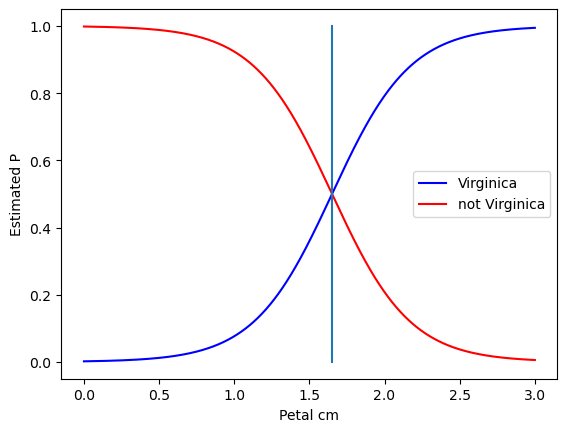

In [57]:
Xnew = np.linspace(0,3,1000).reshape(-1,1)
# get 1000 pedal widths 0-3
yproba = logReg.predict_proba(Xnew)
boundary = Xnew[yproba[:,1] >= 0.5][0,0]
plt.plot(Xnew, yproba[:,1], "b-", label="Virginica")
plt.plot(Xnew, yproba[:,0], "r-", label="not Virginica")
plt.plot([boundary, boundary], [0,1])
plt.ylabel("Estimated P")
plt.xlabel("Petal cm")
plt.legend()
plt.show()

In [60]:
# you can add multiple features for better estimations 

# sklearn adds l2 penalty by default


## Softmax Regression